# # Final Submission for Introduction to Data Analytics for Business

My Final Submission is a study of tech salaries from multinational companies based in Ireland. The data is scraped from Levels.fyi. 
I will compare and contrast different career levels across different companies

# Import any Libraries required for the project

In [1]:
#One time only 
#!pip install pandas-datareader
#!pip install matplotlib

In [146]:
import pandas as pd 
import pandas_profiling as pp
import requests
import numpy as np 
from datetime import datetime 
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas_datareader as pdr
import warnings
import matplotlib

# Import Levels.fyi data and StockMarket Data

In [3]:
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)



In [4]:
# Define the instruments to download. We would like to see Apple, Microsoft and Intel.
tickers = ['AAPL', 'MSFT', 'INTC','META']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2022-01-01'
end_date = '2022-12-31'

# Use pandas_reader.data.DataReader to load the desired data. 
stock_data = pdr.data.DataReader(tickers, 'yahoo', start_date, end_date)
print(stock_data.head())
print(stock_data.dtypes)
print(stock_data.index)

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       INTC        META        AAPL   
Date                                                                    
2022-01-03  180.959732  332.577087  51.178699  338.540009  182.009995   
2022-01-04  178.663071  326.874359  51.111374  336.529999  179.699997   
2022-01-05  173.910660  314.326324  51.813507  324.170013  174.919998   
2022-01-06  171.007507  311.842560  51.948162  332.459991  172.000000   
2022-01-07  171.176514  312.001526  51.399921  331.790009  172.169998   

Attributes                                           High              ...  \
Symbols           MSFT       INTC        META        AAPL        MSFT  ...   
Date                                                                   ...   
2022-01-03  334.750000  53.209999  338.540009  182.880005  338.000000  ...   
2022-01-04  329.010010  53.139999  336.529999  182.940002  335.200012  ...   
2022-01-05  316.380005  5

# Inspect the levels.fyi dataframe

In [5]:
#check if the data has imported ok using head()
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6


In [6]:
#Check how many rows and columns are in the dataframe
df.shape

(62642, 17)

In [7]:
#Check the datatypes
df.dtypes

timestamp                  object
company                    object
level                      object
title                      object
totalyearlycompensation    object
location                   object
yearsofexperience          object
yearsatcompany             object
tag                        object
basesalary                 object
stockgrantvalue            object
bonus                      object
gender                     object
otherdetails               object
cityid                     object
dmaid                      object
rowNumber                   int64
dtype: object

In [8]:
# Examine dataframe to examine columns and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

In [9]:
#Pandas profiling takes several minutes to run so leaving commented out
#df.profile_report()


PermissionError: [Errno 13] Permission denied: 'Orig_df.csv'

# Inspecting the Levels.fyi Data

Looking at the data values in the individual columns of my dataframe for anomolies

In [10]:
#Check the values for years at company for any anomolies
print('Unique values for YearsAtCompany: ')
print(df['yearsatcompany'].unique())
#Can see people have entered in values of 90 
#Check how many rows have 90 for years at company
print((df['yearsatcompany']=='90').sum(), ' outlier with value 90 for yearsatcompany. This should be cleaned up later.')


Unique values for YearsAtCompany: 
['1' '4' '0' '13' '6' '2' '3' '11' '5' '7' '19' '14' '8' '10' '12' '9'
 '22' '15' '25' '16' '18' '17' '27' '21' '43' '20' '24' '31' '29' '34'
 '23' '47' '28' '42' '26' '30' '32' '37' '36' '33' '35' '38' '90' '39']
1  outlier with value 90 for yearsatcompany. This should be cleaned up later.


In [11]:
#Check the values for years of experience for any anomolies
print('Unique values for YearsOfExperience: ')
df['yearsofexperience'].unique()
#Can see people have entered in values of 90 - these rows should be dropped
#Check how many rows have 90 for years of experience
print((df['yearsofexperience']=='90').sum(), ' outlier with value 90 for Years Of Experience. This should be cleaned up later.')

Unique values for YearsOfExperience: 
1  outlier with value 90 for Years Of Experience. This should be cleaned up later.


In [12]:
#Check the values for gender for any anomolies
print('Checking the Gender Column for anomalies: ')
print(df['gender'].unique())
#I can see nulls, Male, Female, Other, Title: Senior Software Engineer - this will need to be cleaned up also
print('Null values and Invalid rows will be cleaned up later. ')


Checking the Gender Column for anomalies: 
['' 'Male' 'Female' 'Other' 'Title: Senior Software Engineer']
Null values and Invalid rows will be cleaned up later. 


In [13]:
#Check the values for title for any anomolies
print('Checking Titles: ')
print(df['title'].unique())
#These look ok


Checking Titles: 
['Product Manager' 'Software Engineer' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Human Resources' 'Product Designer' 'Marketing' 'Business Analyst'
 'Hardware Engineer' 'Sales' 'Recruiter' 'Mechanical Engineer'
 'Management Consultant']


In [14]:
#dealing with NA's.  This function gives output in a single value if any null is present or not.
print('Checking for na values: ')
print (df.isna().sum())
# 0 in all column means there are no null values present in our dataset. If there was - I would have used the fillna() function to replace them with another value.

Checking for na values: 
timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
dtype: int64


In [15]:
#Check for Nulls
df.isnull().sum()
#All 0s mean there are none

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
dtype: int64

In [16]:
#Check for duplicates
print('Checking for duplicate rows: ')
print(df.duplicated().sum(), ' duplicate row(s) present.')


Checking for duplicate rows: 
0  duplicate row(s) present.


In [17]:
# Check if rownumber is unique - I will use this as my index
df['rowNumber'].is_unique

True

# Cleaning the Data

I can see that a number of rows in my dataframe require cleaning: 

    I have extra columns that I dont require.  
    I have duplicate rows to clean
    My Columns are all being treated as Objects, but should be dates, floats, integars etc
    I have invalid entries for Gender


In [18]:
# Drop unwanted columns
df.drop(columns=['level','tag','otherdetails','dmaid'], inplace=True)

#Check the dataframe again to confirm columns are gone
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   title                    62642 non-null  object
 3   totalyearlycompensation  62642 non-null  object
 4   location                 62642 non-null  object
 5   yearsofexperience        62642 non-null  object
 6   yearsatcompany           62642 non-null  object
 7   basesalary               62642 non-null  object
 8   stockgrantvalue          62642 non-null  object
 9   bonus                    62642 non-null  object
 10  gender                   62642 non-null  object
 11  cityid                   62642 non-null  object
 12  rowNumber                62642 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 6.2+ MB
None


In [19]:
#Replace empty and invalid entries for gender with NotDisclosed
df['gender'].replace(['Title: Senior Software Engineer',''],'NotDisclosed', inplace=True)
print(df['gender'].unique())

['NotDisclosed' 'Male' 'Female' 'Other']


In [20]:
#Drop duplicate row if required
df.drop_duplicates (subset=None, keep='first', inplace=True)
#Check again for duplicates - they should be gone now
print(df.duplicated().sum(),' duplicate row(s) present.')

0  duplicate row(s) present.


In [21]:
# Convert some of the numeric columns that are classified as type 'object' to float and integar values
df[["totalyearlycompensation","basesalary","stockgrantvalue","bonus",]]=df[["totalyearlycompensation","basesalary","stockgrantvalue","bonus",]].astype(float)
df[["yearsofexperience","yearsatcompany","cityid"]]=df[["yearsofexperience","yearsatcompany","cityid"]].astype(int)
print (df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62642 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62642 non-null  object 
 2   title                    62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  float64
 4   location                 62642 non-null  object 
 5   yearsofexperience        62642 non-null  int32  
 6   yearsatcompany           62642 non-null  int32  
 7   basesalary               62642 non-null  float64
 8   stockgrantvalue          62642 non-null  float64
 9   bonus                    62642 non-null  float64
 10  gender                   62642 non-null  object 
 11  cityid                   62642 non-null  int32  
 12  rowNumber                62642 non-null  int64  
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 6.0+ MB
None


In [22]:
#Remove rows of data where the person has entered that they have over 50 years in the company
print('Maximum number of years in Company: ',df['yearsatcompany'].max())
print('Maximum number of years of Experience: ',df['yearsofexperience'].max())
print ('Cleaning up entries > 50 for YearsAtCompany and YearsOfExperience')
df=df[df['yearsatcompany']<51]
df=df[df['yearsofexperience']<51]
print('Maximum number of years in Company: ',df['yearsatcompany'].max())
print('Maximum number of years of Experience: ',df['yearsofexperience'].max())

Maximum number of years in Company:  90
Maximum number of years of Experience:  90
Cleaning up entries > 50 for YearsAtCompany and YearsOfExperience
Maximum number of years in Company:  47
Maximum number of years of Experience:  50


In [23]:
#Corinna Check accenture
# Are there any entries for Intel?
Intel=(df['company'] == 'Intel')
df.loc[Intel]
#957 entries

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,rowNumber
546,5/8/2018 22:46:53,Accenture,Product Manager,337081.0,"San Francisco, CA",29,7,313344.0,4247.0,19490.0,Male,7419,599
575,5/13/2018 6:53:43,Accenture,Software Engineering Manager,116810.0,"Chicago, IL",9,7,116810.0,0.0,0.0,Female,8198,631
1029,7/15/2018 9:09:14,Accenture,Software Engineer,168.0,"Chicago, IL",10,5,153.0,0.0,15.0,Male,8198,1126
2902,10/31/2018 19:04:13,Accenture,Software Engineering Manager,170.0,"St. Louis, MO",17,4,170.0,0.0,0.0,NotDisclosed,11896,3342
2960,10/31/2018 21:25:40,Accenture,Software Engineer,105.0,"Chicago, IL",3,1,93.0,2.0,10.0,NotDisclosed,8198,3412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60594,8/2/2021 7:38:49,Accenture,Product Manager,94.0,"Boston, MA",7,3,89.0,0.0,5.0,Male,8816,80953
61980,8/11/2021 21:55:50,Accenture,Data Scientist,21.0,"Bangalore, KA, India",4,0,17.0,0.0,4.0,Male,4058,82908
62220,8/13/2021 12:54:19,Accenture,Software Engineering Manager,27.0,"Bengaluru, KA, India",6,15,25.0,0.0,2.0,Male,42498,83242
62472,8/15/2021 18:05:48,Accenture,Software Engineer,114.0,"Cincinnati, OH",6,2,105.0,0.0,9.0,NotDisclosed,10274,83586


In [25]:
#Convert all Company values to upper case to clean up examples such as amazon Amazon AMAZON
df['company']=df['company'].str.upper()
df['company']=df['company'].str.strip()


In [26]:
#Convert timestamp to pandas datetime and keep just the date portion
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
#Add a new column for Date
#df['Date'] = df['timestamp'].dt.date
#df['Date_New'] = df['timestamp'].dt.date
#df.dtypes()

In [27]:
df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation    float64
location                    object
yearsofexperience            int32
yearsatcompany               int32
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int32
rowNumber                    int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62633 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62633 non-null  object 
 1   company                  62633 non-null  object 
 2   title                    62633 non-null  object 
 3   totalyearlycompensation  62633 non-null  float64
 4   location                 62633 non-null  object 
 5   yearsofexperience        62633 non-null  int32  
 6   yearsatcompany           62633 non-null  int32  
 7   basesalary               62633 non-null  float64
 8   stockgrantvalue          62633 non-null  float64
 9   bonus                    62633 non-null  float64
 10  gender                   62633 non-null  object 
 11  cityid                   62633 non-null  int32  
 12  rowNumber                62633 non-null  int64  
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 6.0+ MB


In [29]:
#Set the index on rownumber
#df.reset_index(inplace = True)
df.set_index('rowNumber',inplace=True)

In [30]:
#Rename columns for readability
df.columns = ["Date","Company","Title","TCOMP","Location","YearsOfExperience","YearsOfService","BaseSalary","StockGrant","Bonus", "Gender", "CityId"]

In [31]:
#check that the un-required columns are gone from the dataframe and that the numeric values are no longer showing as object types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62633 entries, 1 to 83875
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62633 non-null  object 
 1   Company            62633 non-null  object 
 2   Title              62633 non-null  object 
 3   TCOMP              62633 non-null  float64
 4   Location           62633 non-null  object 
 5   YearsOfExperience  62633 non-null  int32  
 6   YearsOfService     62633 non-null  int32  
 7   BaseSalary         62633 non-null  float64
 8   StockGrant         62633 non-null  float64
 9   Bonus              62633 non-null  float64
 10  Gender             62633 non-null  object 
 11  CityId             62633 non-null  int32  
dtypes: float64(4), int32(3), object(5)
memory usage: 5.5+ MB


In [32]:
#Maybe split the Location column?
#df[['City','Code']] = df['Location'].str.split(' ', expand=True)

In [33]:
df.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,CityId
count,6.263300e+04,62633.000000,62633.000000,6.263300e+04,6.263300e+04,62633.000000,62633.000000
mean,3.175749e+03,7.183673,2.698242,1.798378e+03,1.135023e+03,242.347964,9856.130331
std,3.878154e+04,6.406633,3.504292,1.927331e+04,2.520792e+04,3709.453282,6679.329011
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.160000e+02,3.000000,0.000000,8.800000e+01,0.000000e+00,1.000000,7369.000000
50%,1.830000e+02,6.000000,1.000000,1.310000e+02,2.300000e+01,13.000000,7839.000000
75%,2.690000e+02,10.000000,4.000000,1.810000e+02,6.400000e+01,27.000000,11521.000000
max,3.386013e+06,50.000000,47.000000,2.057772e+06,3.140803e+06,384026.000000,47926.000000


# Take a quick look at the survey results

In [34]:
#Mean Number of years the person was in the company at the time of the survey
print("Mean Years of Service: " + str(df['YearsOfService'].mean()))

#Average Number of years of Experience the person had at the time of the survey
print("Mean Years of Experience: " + str(df['YearsOfExperience'].mean()))


Mean Years of Service: 2.6982421407245383
Mean Years of Experience: 7.183673143550524


In [35]:
# Are there any entries for Intel?
Intel=(df['Company'] == 'INTEL')
df.loc[Intel]
#957 entries

,Date,Company,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId
rowNumber,,,,,,,,,,,,
136,2017-10-31,INTEL,Software Engineering Manager,158.0,"Hillsboro, OR",9,3,136.0,12.0,10.0,NotDisclosed,10500
449,2018-04-04,INTEL,Software Engineer,63913.0,"Hillsboro, OR",3,3,51713.0,4186.0,8014.0,NotDisclosed,10500
518,2018-04-22,INTEL,Software Engineer,0.0,"Folsom, CA",5,9,0.0,0.0,0.0,Male,7193
553,2018-04-28,INTEL,Software Engineer,11014.0,"Santa Clara, CA",3,2,148.0,6543.0,4323.0,Male,7434
558,2018-04-30,INTEL,Software Engineer,167.0,"Hillsboro, OR",5,5,141.0,15.0,11.0,Male,10500
...,...,...,...,...,...,...,...,...,...,...,...,...
83310,2021-08-13,INTEL,Hardware Engineer,70.0,"Taipei, TP, Taiwan",3,0,61.0,7.0,2.0,Male,6744
83518,2021-08-15,INTEL,Software Engineer,73.0,"Haifa, HA, Israel",12,10,56.0,3.0,14.0,Male,4037
83559,2021-08-15,INTEL,Software Engineer,220.0,"Hillsboro, OH",3,3,192.0,5.0,23.0,NotDisclosed,10304


In [36]:
#Which Companies are located in Ireland
InIreland=df[df["Location"].str.contains("Ireland")]
print(InIreland['Company'].unique())
# Convert to List
FilteredCompanies=InIreland.Company.unique().tolist()

['AMAZON' 'MICROSOFT' 'GOOGLE' 'FACEBOOK' 'INTERCOM' 'WORKDAY' 'GUIDEWIRE'
 'INTEL' 'ORACLE' 'QUALCOMM' 'JPMORGAN CHASE' 'CIRCLECI' 'TOAST'
 'ARISTA NETWORKS' 'DELL TECHNOLOGIES' 'MONGODB' 'FIDELITY INVESTMENTS'
 'HUBSPOT' 'CISCO' 'PIVOTAL' 'IBM' 'STARTUP' 'TWILIO' 'GROUPON' 'SLACK'
 'GENERAL MOTORS' 'STRIPE' 'EXPEDIA' 'ARM' 'AWS' 'ANALOG DEVICES'
 'DELOITTE' 'N/A' 'SHUTTERSTOCK' 'VMWARE' 'TENABLE' 'HUAWEI' 'APPLE'
 'XILINX' 'ZENDESK' 'NOKIA' 'ZALANDO' 'WALMART LABS' 'HPE' 'SALESFORCE'
 'ACCENTURE' 'SAP' 'QUALTRICS' 'INFOSYS' 'KPMG' 'MASTERCARD' 'EQUIFAX'
 'SERVICENOW' 'QUANTCAST' 'EY' 'DXC TECHNOLOGY' 'PINTEREST' 'WORKHUMAN'
 'ERICSSON' 'PWC' 'LINKEDIN' 'RIOT GAMES' 'RAPID7' 'OPTUM' 'DEUTSCHE BANK'
 'CANONICAL' 'REDDIT' 'AMDOCS' 'BLACKBERRY' 'TATA CONSULTANCY SERVICES'
 'BNY MELLON' 'BANK OF AMERICA' 'SQUARESPACE' 'VIASAT'
 'SUSQUEHANNA INTERNATIONAL GROUP' 'FIREEYE' 'GITLAB']


# Filter the dataframe for Multinational Companies of Interest based in Ireland

In [37]:
print(FilteredCompanies)

['AMAZON', 'MICROSOFT', 'GOOGLE', 'FACEBOOK', 'INTERCOM', 'WORKDAY', 'GUIDEWIRE', 'INTEL', 'ORACLE', 'QUALCOMM', 'JPMORGAN CHASE', 'CIRCLECI', 'TOAST', 'ARISTA NETWORKS', 'DELL TECHNOLOGIES', 'MONGODB', 'FIDELITY INVESTMENTS', 'HUBSPOT', 'CISCO', 'PIVOTAL', 'IBM', 'STARTUP', 'TWILIO', 'GROUPON', 'SLACK', 'GENERAL MOTORS', 'STRIPE', 'EXPEDIA', 'ARM', 'AWS', 'ANALOG DEVICES', 'DELOITTE', 'N/A', 'SHUTTERSTOCK', 'VMWARE', 'TENABLE', 'HUAWEI', 'APPLE', 'XILINX', 'ZENDESK', 'NOKIA', 'ZALANDO', 'WALMART LABS', 'HPE', 'SALESFORCE', 'ACCENTURE', 'SAP', 'QUALTRICS', 'INFOSYS', 'KPMG', 'MASTERCARD', 'EQUIFAX', 'SERVICENOW', 'QUANTCAST', 'EY', 'DXC TECHNOLOGY', 'PINTEREST', 'WORKHUMAN', 'ERICSSON', 'PWC', 'LINKEDIN', 'RIOT GAMES', 'RAPID7', 'OPTUM', 'DEUTSCHE BANK', 'CANONICAL', 'REDDIT', 'AMDOCS', 'BLACKBERRY', 'TATA CONSULTANCY SERVICES', 'BNY MELLON', 'BANK OF AMERICA', 'SQUARESPACE', 'VIASAT', 'SUSQUEHANNA INTERNATIONAL GROUP', 'FIREEYE', 'GITLAB']


In [38]:
Filtereddf=(df['Company'].isin(FilteredCompanies)  & df['Location'].str.contains('Ireland',na=False))
CompaniesInIrelanddf=df.loc[Filtereddf]
CompaniesInIrelanddf

,Date,Company,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId
rowNumber,,,,,,,,,,,,
53,2017-08-13,AMAZON,Software Engineer,231.0,"Dublin, DN, Ireland",11,3,115.0,115.0,1.0,NotDisclosed,4015
164,2017-11-30,MICROSOFT,Software Engineer,104973.0,"Dublin, DN, Ireland",17,6,92401.0,4350.0,8222.0,NotDisclosed,4015
380,2018-03-11,GOOGLE,Software Engineering Manager,425.0,"Dublin, DN, Ireland",24,12,87.0,305.0,33.0,NotDisclosed,4015
381,2018-03-11,GOOGLE,Software Engineer,227.0,"Dublin, DN, Ireland",20,7,64.0,133.0,30.0,NotDisclosed,4015
382,2018-03-11,FACEBOOK,Software Engineering Manager,392.0,"Dublin, DN, Ireland",22,1,85.0,264.0,43.0,NotDisclosed,4015
...,...,...,...,...,...,...,...,...,...,...,...,...
83505,2021-08-15,GOOGLE,Software Engineer,186.0,"Dublin, DN, Ireland",9,1,150.0,24.0,12.0,Male,4015
83509,2021-08-15,GITLAB,Marketing,134.0,"Dublin, DN, Ireland",6,1,127.0,6.0,1.0,Female,4015
83562,2021-08-15,AMAZON,Software Engineer,159.0,"Dublin, DN, Ireland",12,0,123.0,27.0,9.0,NotDisclosed,4015


In [39]:
CompaniesInIrelanddf.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,CityId
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,1574.521472,7.242331,2.334356,940.861963,229.542945,404.116564,4962.668712
std,14719.920630,5.663338,3.100648,8839.063235,2400.560427,4931.962611,4382.405339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4013.000000
25%,76.250000,3.000000,1.000000,61.000000,0.000000,0.000000,4015.000000
50%,116.000000,6.000000,1.000000,81.500000,14.000000,7.000000,4015.000000
75%,171.500000,10.000000,3.000000,120.750000,35.750000,16.000000,4015.000000
max,204135.000000,31.000000,30.000000,96932.000000,32457.000000,83681.000000,28920.000000


In [40]:
#High Earners
High_Earners = (CompaniesInIrelanddf['TCOMP'] > 200)
CompaniesInIrelanddf.loc[High_Earners]

,Date,Company,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId
rowNumber,,,,,,,,,,,,
53,2017-08-13,AMAZON,Software Engineer,231.0,"Dublin, DN, Ireland",11,3,115.0,115.0,1.0,NotDisclosed,4015
164,2017-11-30,MICROSOFT,Software Engineer,104973.0,"Dublin, DN, Ireland",17,6,92401.0,4350.0,8222.0,NotDisclosed,4015
380,2018-03-11,GOOGLE,Software Engineering Manager,425.0,"Dublin, DN, Ireland",24,12,87.0,305.0,33.0,NotDisclosed,4015
381,2018-03-11,GOOGLE,Software Engineer,227.0,"Dublin, DN, Ireland",20,7,64.0,133.0,30.0,NotDisclosed,4015
382,2018-03-11,FACEBOOK,Software Engineering Manager,392.0,"Dublin, DN, Ireland",22,1,85.0,264.0,43.0,NotDisclosed,4015
384,2018-03-11,WORKDAY,Software Engineer,132951.0,"Dublin, DN, Ireland",10,1,96932.0,28576.0,7443.0,NotDisclosed,4015
447,2018-04-04,AMAZON,Software Engineer,204135.0,"Dublin, DN, Ireland",11,1,87997.0,32457.0,83681.0,NotDisclosed,4015
1700,2018-08-26,FACEBOOK,Software Engineering Manager,29222.0,"Dublin, DN, Ireland",24,2,96.0,264.0,28862.0,NotDisclosed,4015
2024,2018-09-12,GOOGLE,Software Engineering Manager,351.0,"Dublin, DN, Ireland",11,20,164.0,162.0,25.0,NotDisclosed,4015


In [56]:
#Top TCOMP Companies
IrishBaseSalarySorted=CompaniesInIrelanddf.sort_values(['TCOMP'],ascending=False)
IrishBaseSalarySorted.head()

,Date,Company,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId
rowNumber,,,,,,,,,,,,
447,2018-04-04,AMAZON,Software Engineer,204135.0,"Dublin, DN, Ireland",11,1,87997.0,32457.0,83681.0,NotDisclosed,4015
384,2018-03-11,WORKDAY,Software Engineer,132951.0,"Dublin, DN, Ireland",10,1,96932.0,28576.0,7443.0,NotDisclosed,4015
164,2017-11-30,MICROSOFT,Software Engineer,104973.0,"Dublin, DN, Ireland",17,6,92401.0,4350.0,8222.0,NotDisclosed,4015
1700,2018-08-26,FACEBOOK,Software Engineering Manager,29222.0,"Dublin, DN, Ireland",24,2,96.0,264.0,28862.0,NotDisclosed,4015
56064,2021-01-31,STRIPE,Software Engineer,540.0,"Dublin, DN, Ireland",10,1,148.0,370.0,22.0,Male,4015


In [57]:

IrishBaseSalaryStatistics=IrishBaseSalarySorted.groupby('Company')['BaseSalary'].agg(['mean', 'min', 'max'])
IrishBaseSalaryStatistics.to_csv("IrishBaseSalaryStatistics1.csv")
print(IrishBaseSalaryStatistics)

                       mean   min      max
Company                                   
ACCENTURE         54.750000  25.0    103.0
AMAZON          1494.015873   0.0  87997.0
AMDOCS            92.000000  92.0     92.0
ANALOG DEVICES    51.500000  37.0     63.0
APPLE             62.500000  48.0     77.0
...                     ...   ...      ...
WORKDAY         5181.473684  55.0  96932.0
WORKHUMAN         98.500000  79.0    111.0
XILINX            68.000000  68.0     68.0
ZALANDO          120.000000  59.0    206.0
ZENDESK           81.285714  48.0    137.0

[77 rows x 3 columns]


In [58]:
#company years of service statistics
IrishYearsOfServiceStatistics=CompaniesInIrelanddf.groupby('Company')['YearsOfService'].agg(['mean', 'min', 'max'])   
print(IrishYearsOfServiceStatistics)
#CompaniesInIrelanddf.to_csv('CorinnaCheckYearsOfService.csv')

                    mean  min  max
Company                           
ACCENTURE       3.500000    0    6
AMAZON          1.365079    0   11
AMDOCS          0.000000    0    0
ANALOG DEVICES  1.750000    1    4
APPLE           2.000000    1    3
...                  ...  ...  ...
WORKDAY         2.315789    0    9
WORKHUMAN       0.750000    0    1
XILINX          4.000000    4    4
ZALANDO         2.750000    0    4
ZENDESK         2.714286    1    4

[77 rows x 3 columns]


In [59]:
#export the CompaniesInIrelanddf dataframe to a csv file
CompaniesInIrelanddf.to_csv('CompaniesInIreland_SalaryData.csv')

<AxesSubplot:>

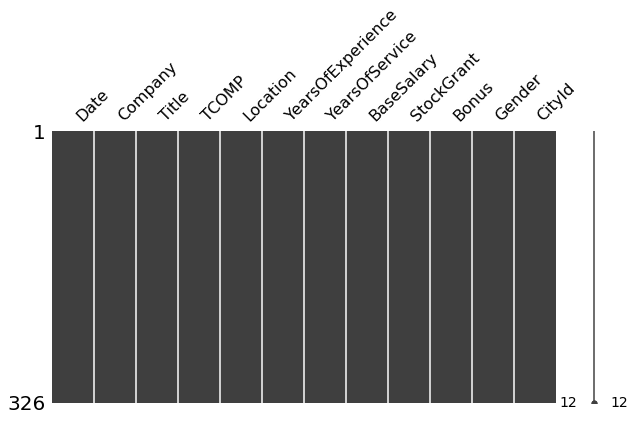

In [60]:
msno.matrix(CompaniesInIrelanddf, figsize=(10, 5))

In [ ]:
#CompaniesInIrelanddf.profile_report()

In [61]:
#Filter Base Salary outliers - filter top and bottom 5% 
CompaniesInIrelanddf_filtered = CompaniesInIrelanddf[CompaniesInIrelanddf['BaseSalary'].between(df['BaseSalary'].quantile(.05),df['BaseSalary'].quantile(.95))]
CompaniesInIrelanddf_filtered = CompaniesInIrelanddf[CompaniesInIrelanddf['TCOMP'].between(df['TCOMP'].quantile(.05),df['BaseSalary'].quantile(.95))]

In [62]:
CompaniesInIrelanddf_filtered.to_csv('CompaniesInIreland_SalaryData_filtered.csv')

# Visualize our Data

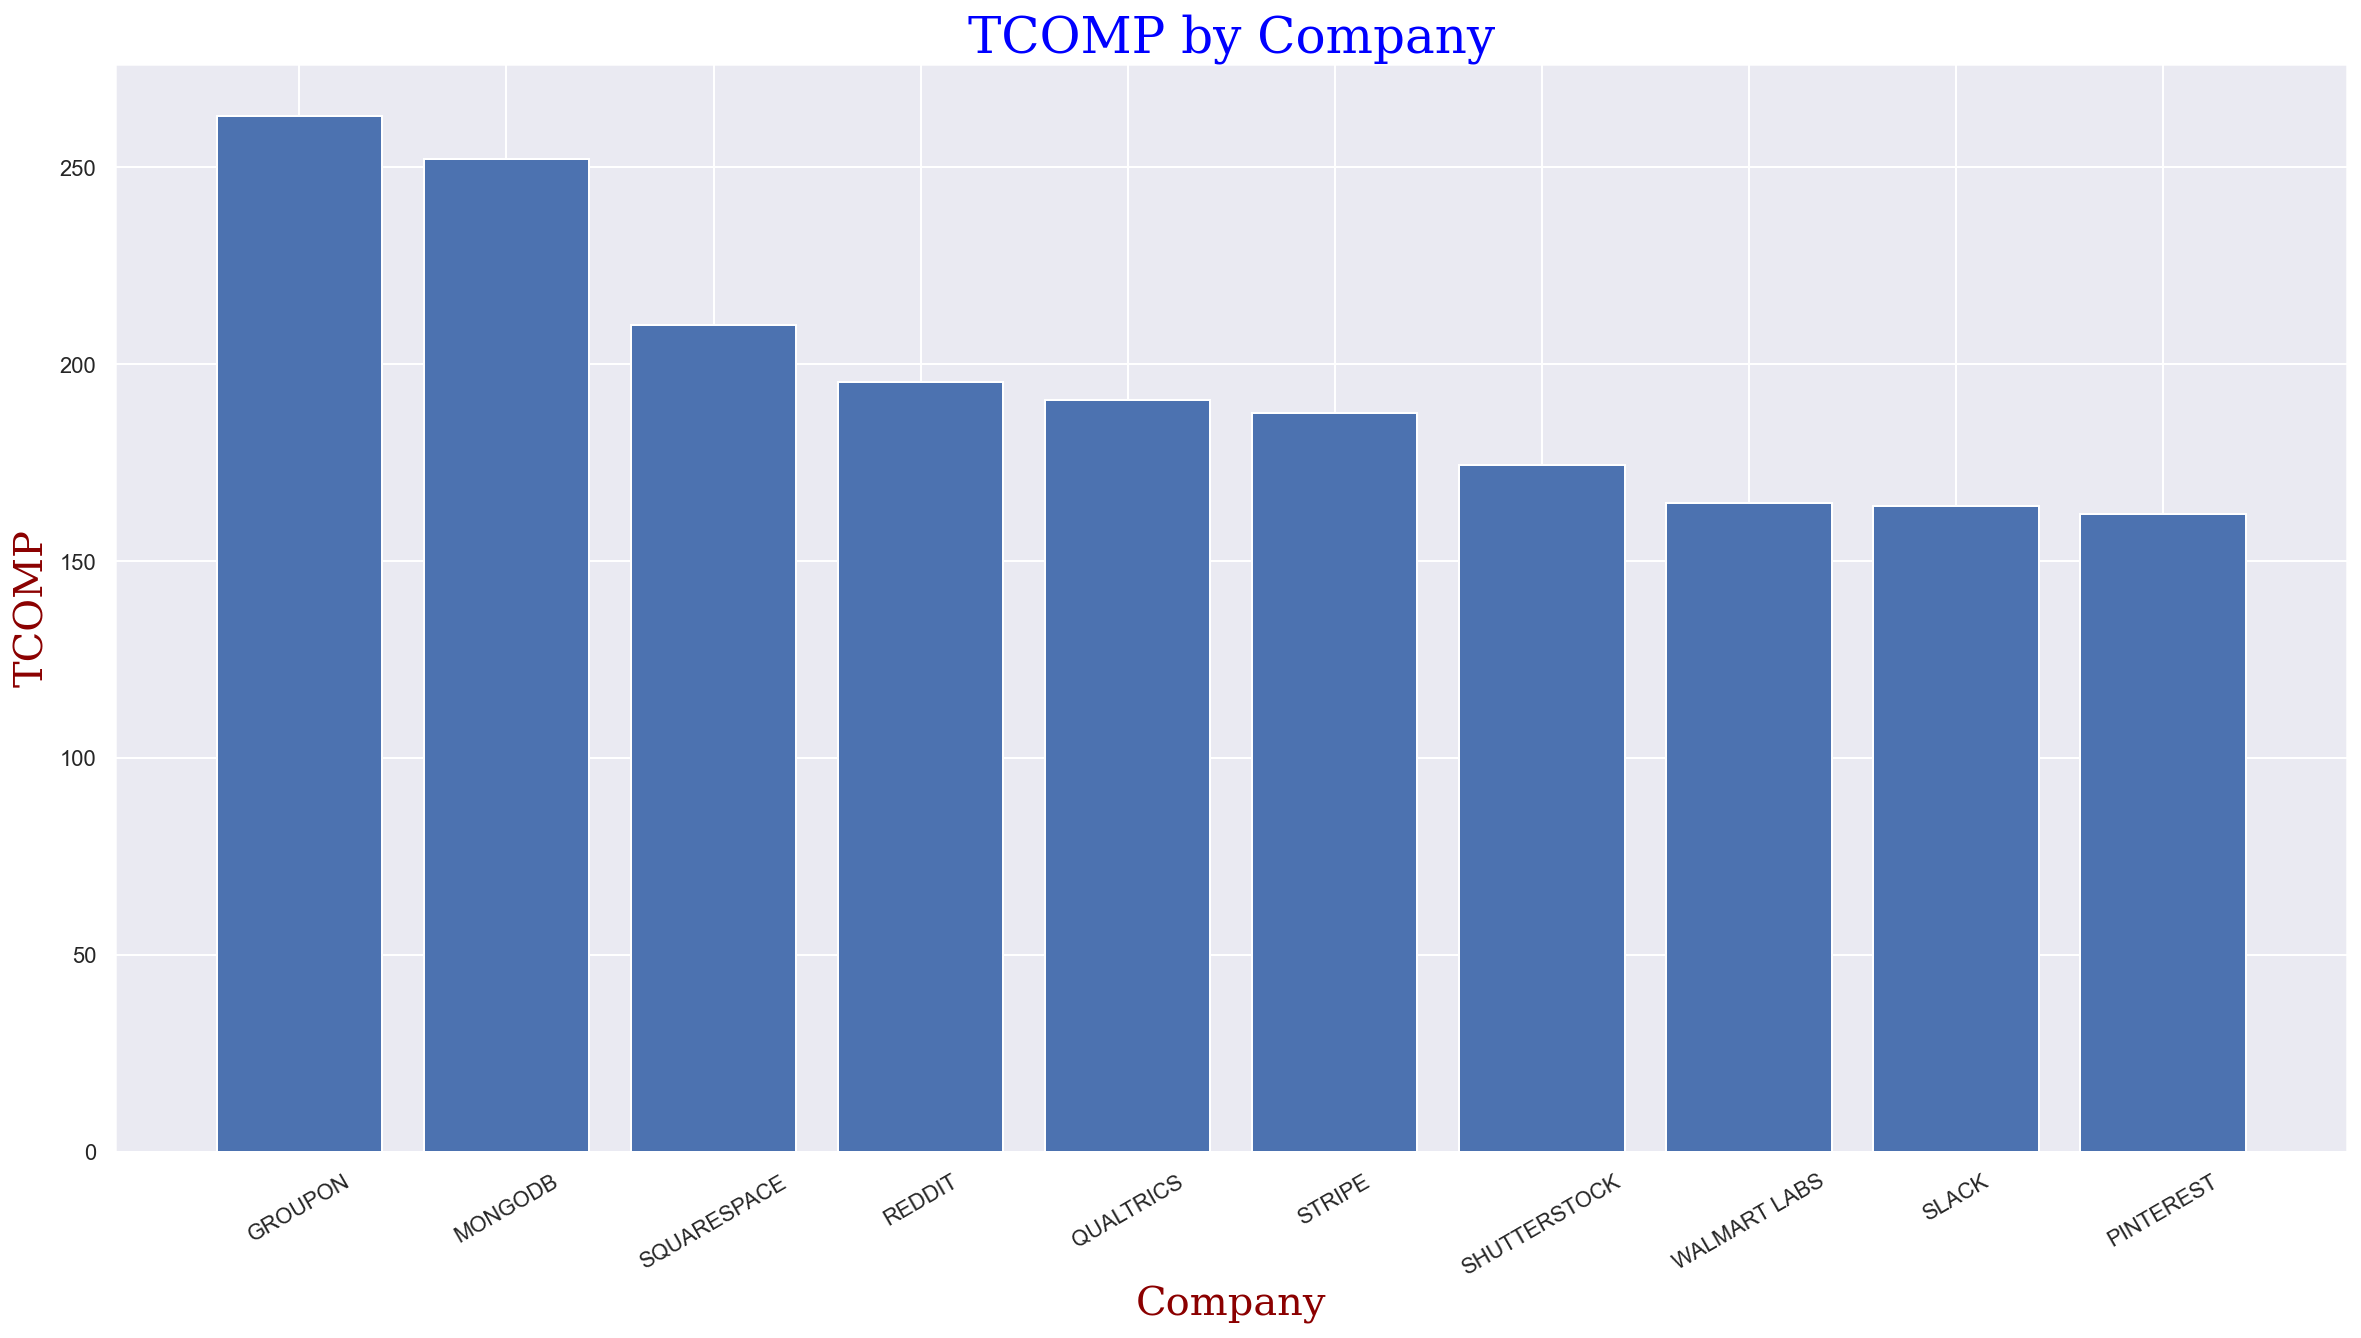

In [92]:
#Visualise TCOMP for top 10 companies
TCOMPChart=CompaniesInIrelanddf_filtered.groupby(['Company'])['TCOMP'].mean().reset_index().sort_values('TCOMP',ascending = False )

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [20, 10]
# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

TCOMPChartTop10=TCOMPChart.nlargest(n=10, columns=['TCOMP'], keep="all")
#print(TCOMPChart.head(10))


font1 = {'family':'serif','color':'blue','size':25}
font2 = {'family':'serif','color':'darkred','size':20}

#Rotate the x-axis labels and define labels
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("TCOMP" , fontdict = font2)
plt.xlabel("Company" , fontdict = font2)
plt.title("TCOMP by Company" , fontdict = font1) 
plt.bar(TCOMPChartTop10["Company"],TCOMPChartTop10["TCOMP"])
plt.show()




         Company        Gender  BaseSalary
78        REDDIT          Male       207.0
40       GROUPON  NotDisclosed       189.0
98  WALMART LABS  NotDisclosed       187.0
88   SQUARESPACE          Male       182.0
86  SHUTTERSTOCK  NotDisclosed       178.0


<AxesSubplot:xlabel='Company', ylabel='BaseSalary'>

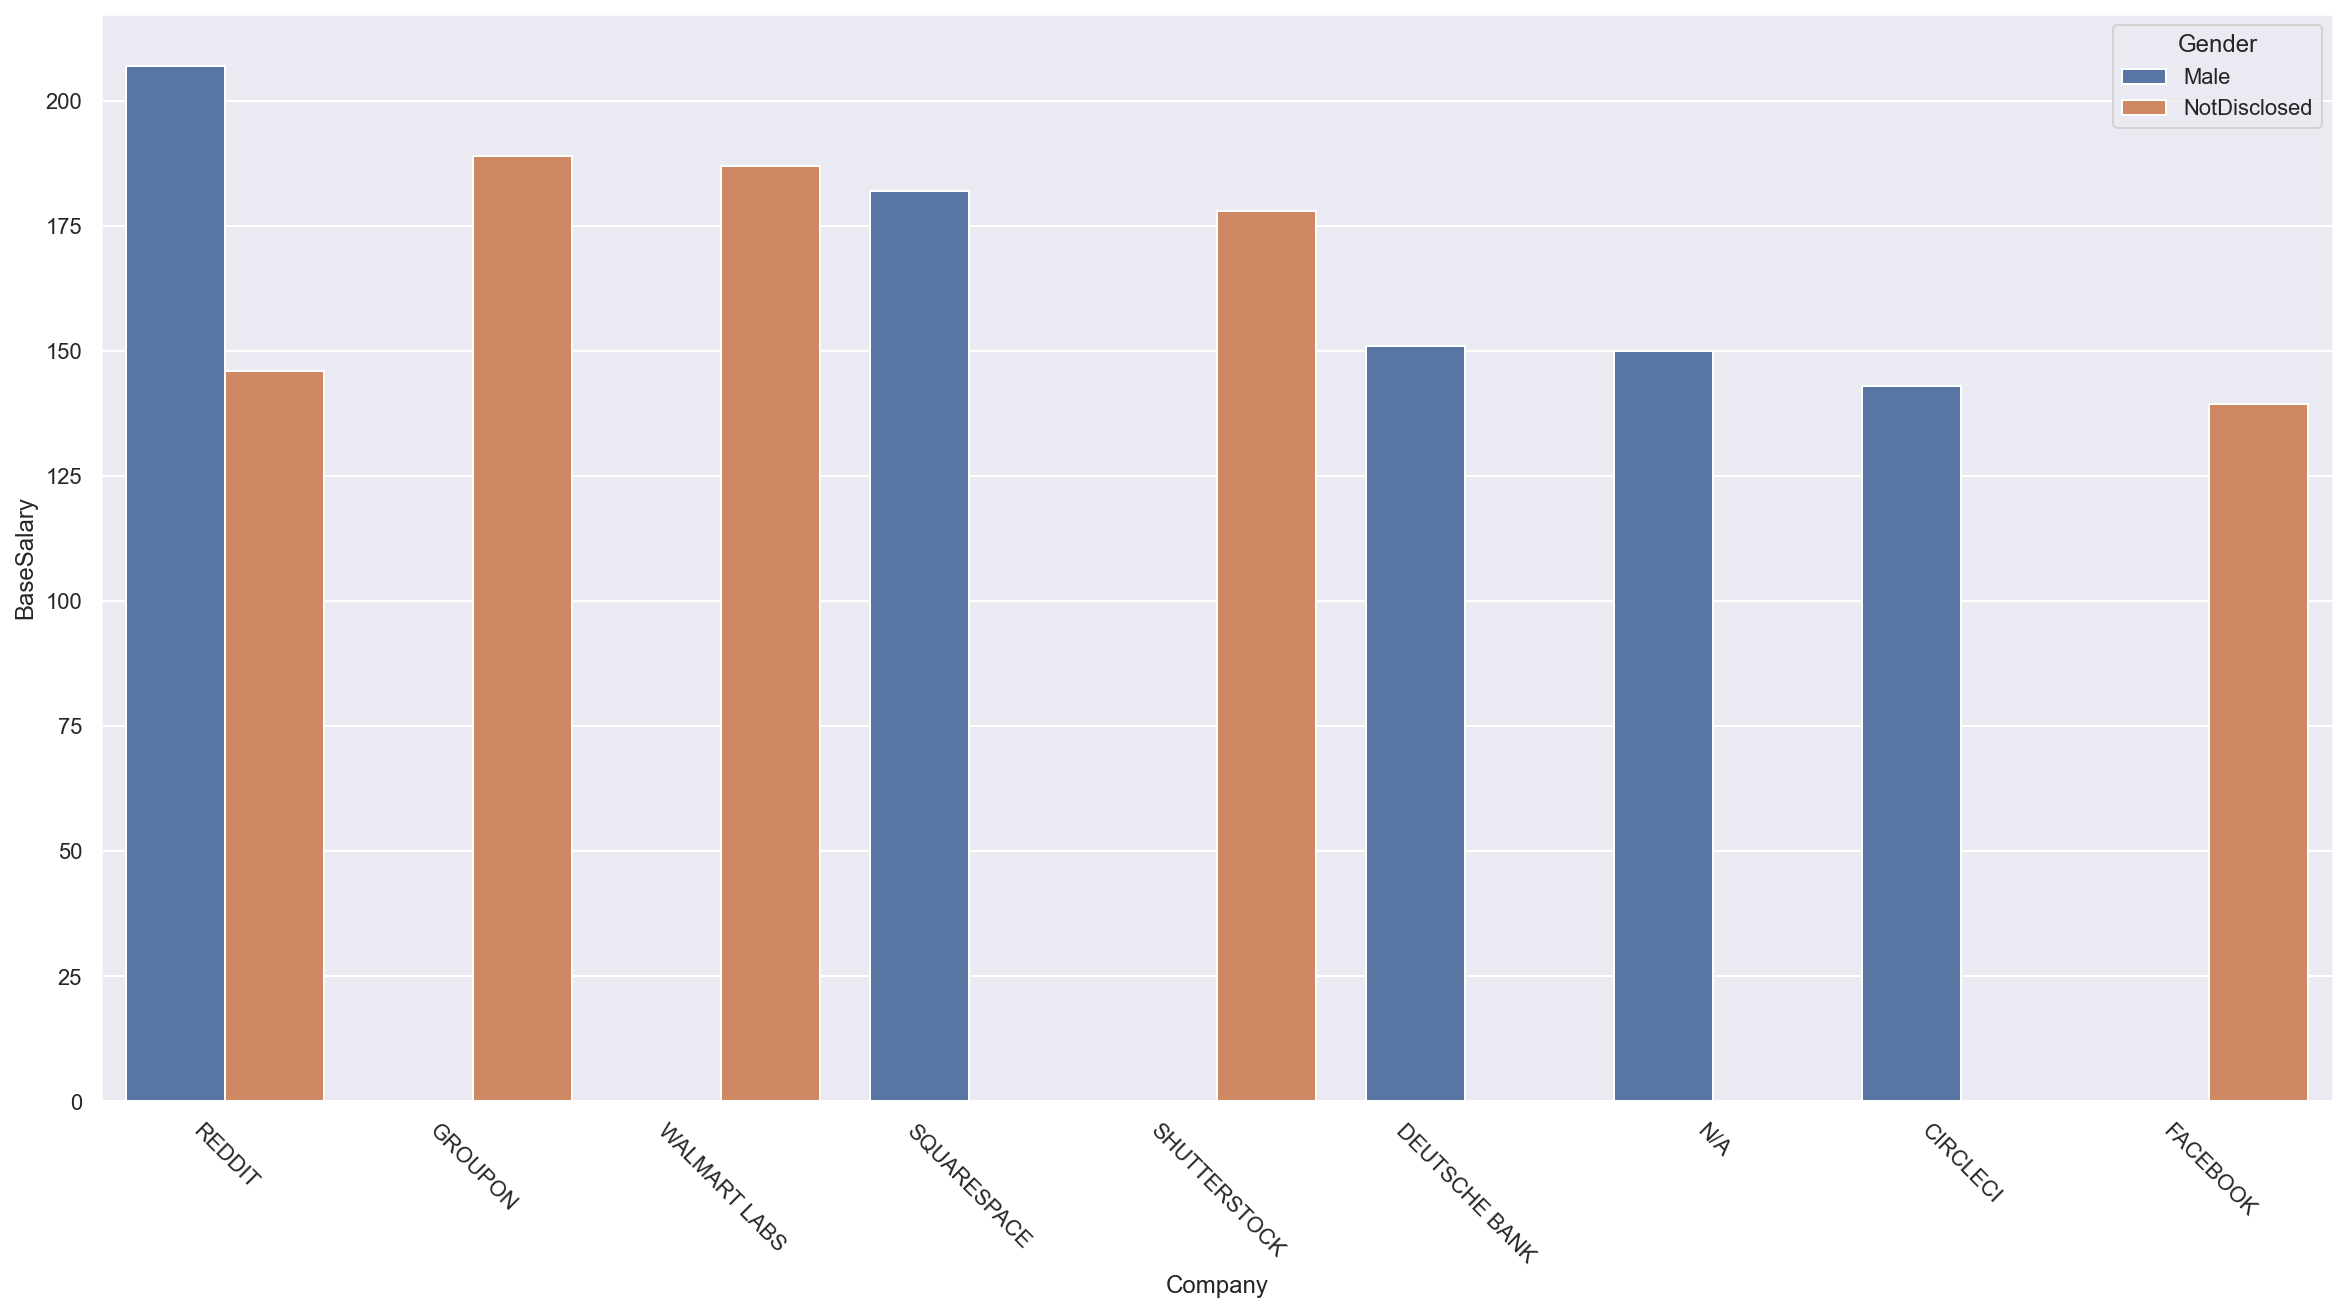

In [101]:
#Visualise TCOMP by Company and Gender using Seaborn
sns.set(rc = {'figure.figsize':(20,10)})

#Visualise TCOMP for top 10 companies
SalaryByGender=CompaniesInIrelanddf_filtered.groupby(['Company','Gender'])['BaseSalary'].mean().reset_index().sort_values('BaseSalary',ascending = False )
SalaryByGenderTop10=SalaryByGender.nlargest(n=10, columns=['BaseSalary'], keep="all")
# Set the figure size - handy for larger output
#plt.rcParams["figure.figsize"] = [20, 10]
# Set up with a higher resolution screen
#%config InlineBackend.figure_format = 'retina'

#SalaryByGenderTop10=SalaryByGender.nlargest(n=10, columns=['TCOMP'], keep="all")
print(SalaryByGenderTop10.head())
plt.xticks(rotation=-45)
sns.barplot(data=SalaryByGenderTop10, y='BaseSalary', x='Company', hue='Gender')





(-1.0, 35.0)

<Figure size 864x576 with 0 Axes>

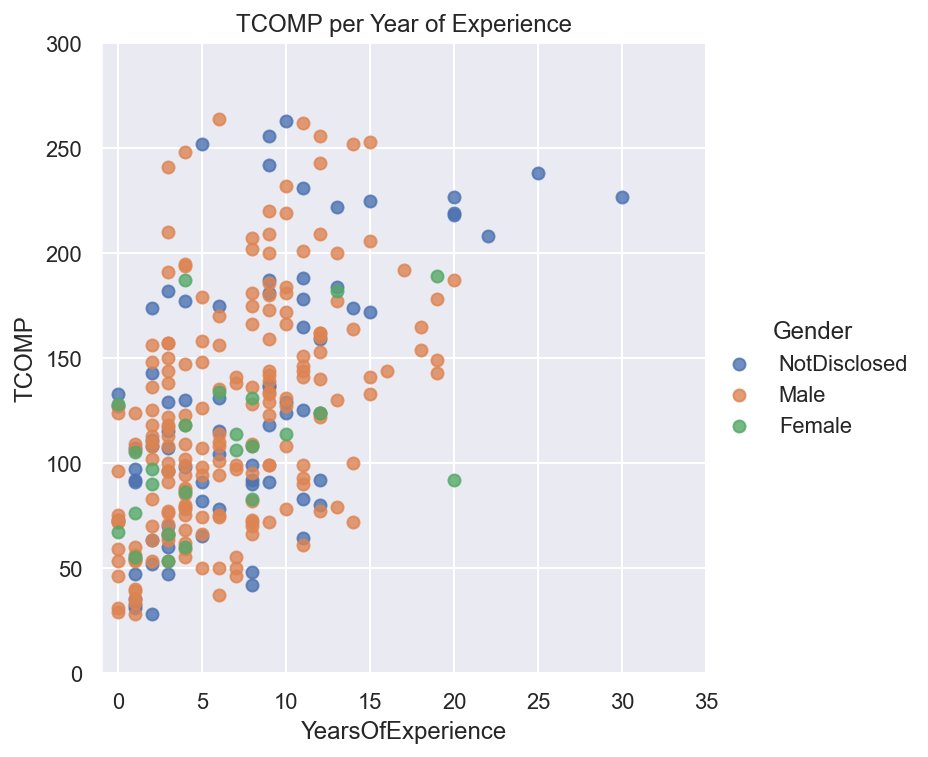

In [122]:
#Create a Scattergraph Years of Experience to Total compensation

# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Scatterplot arguments
#sns.set(rc = {'figure.figsize':(12,8)})
sns.lmplot(x='YearsOfExperience', y='TCOMP', data=CompaniesInIrelanddf_filtered,
           fit_reg=False, # No regression line
           hue='Gender').set(title='TCOMP per Year of Experience')   # Color by gender

plt.ylim(0, 300)
plt.xlim(-1, 35)

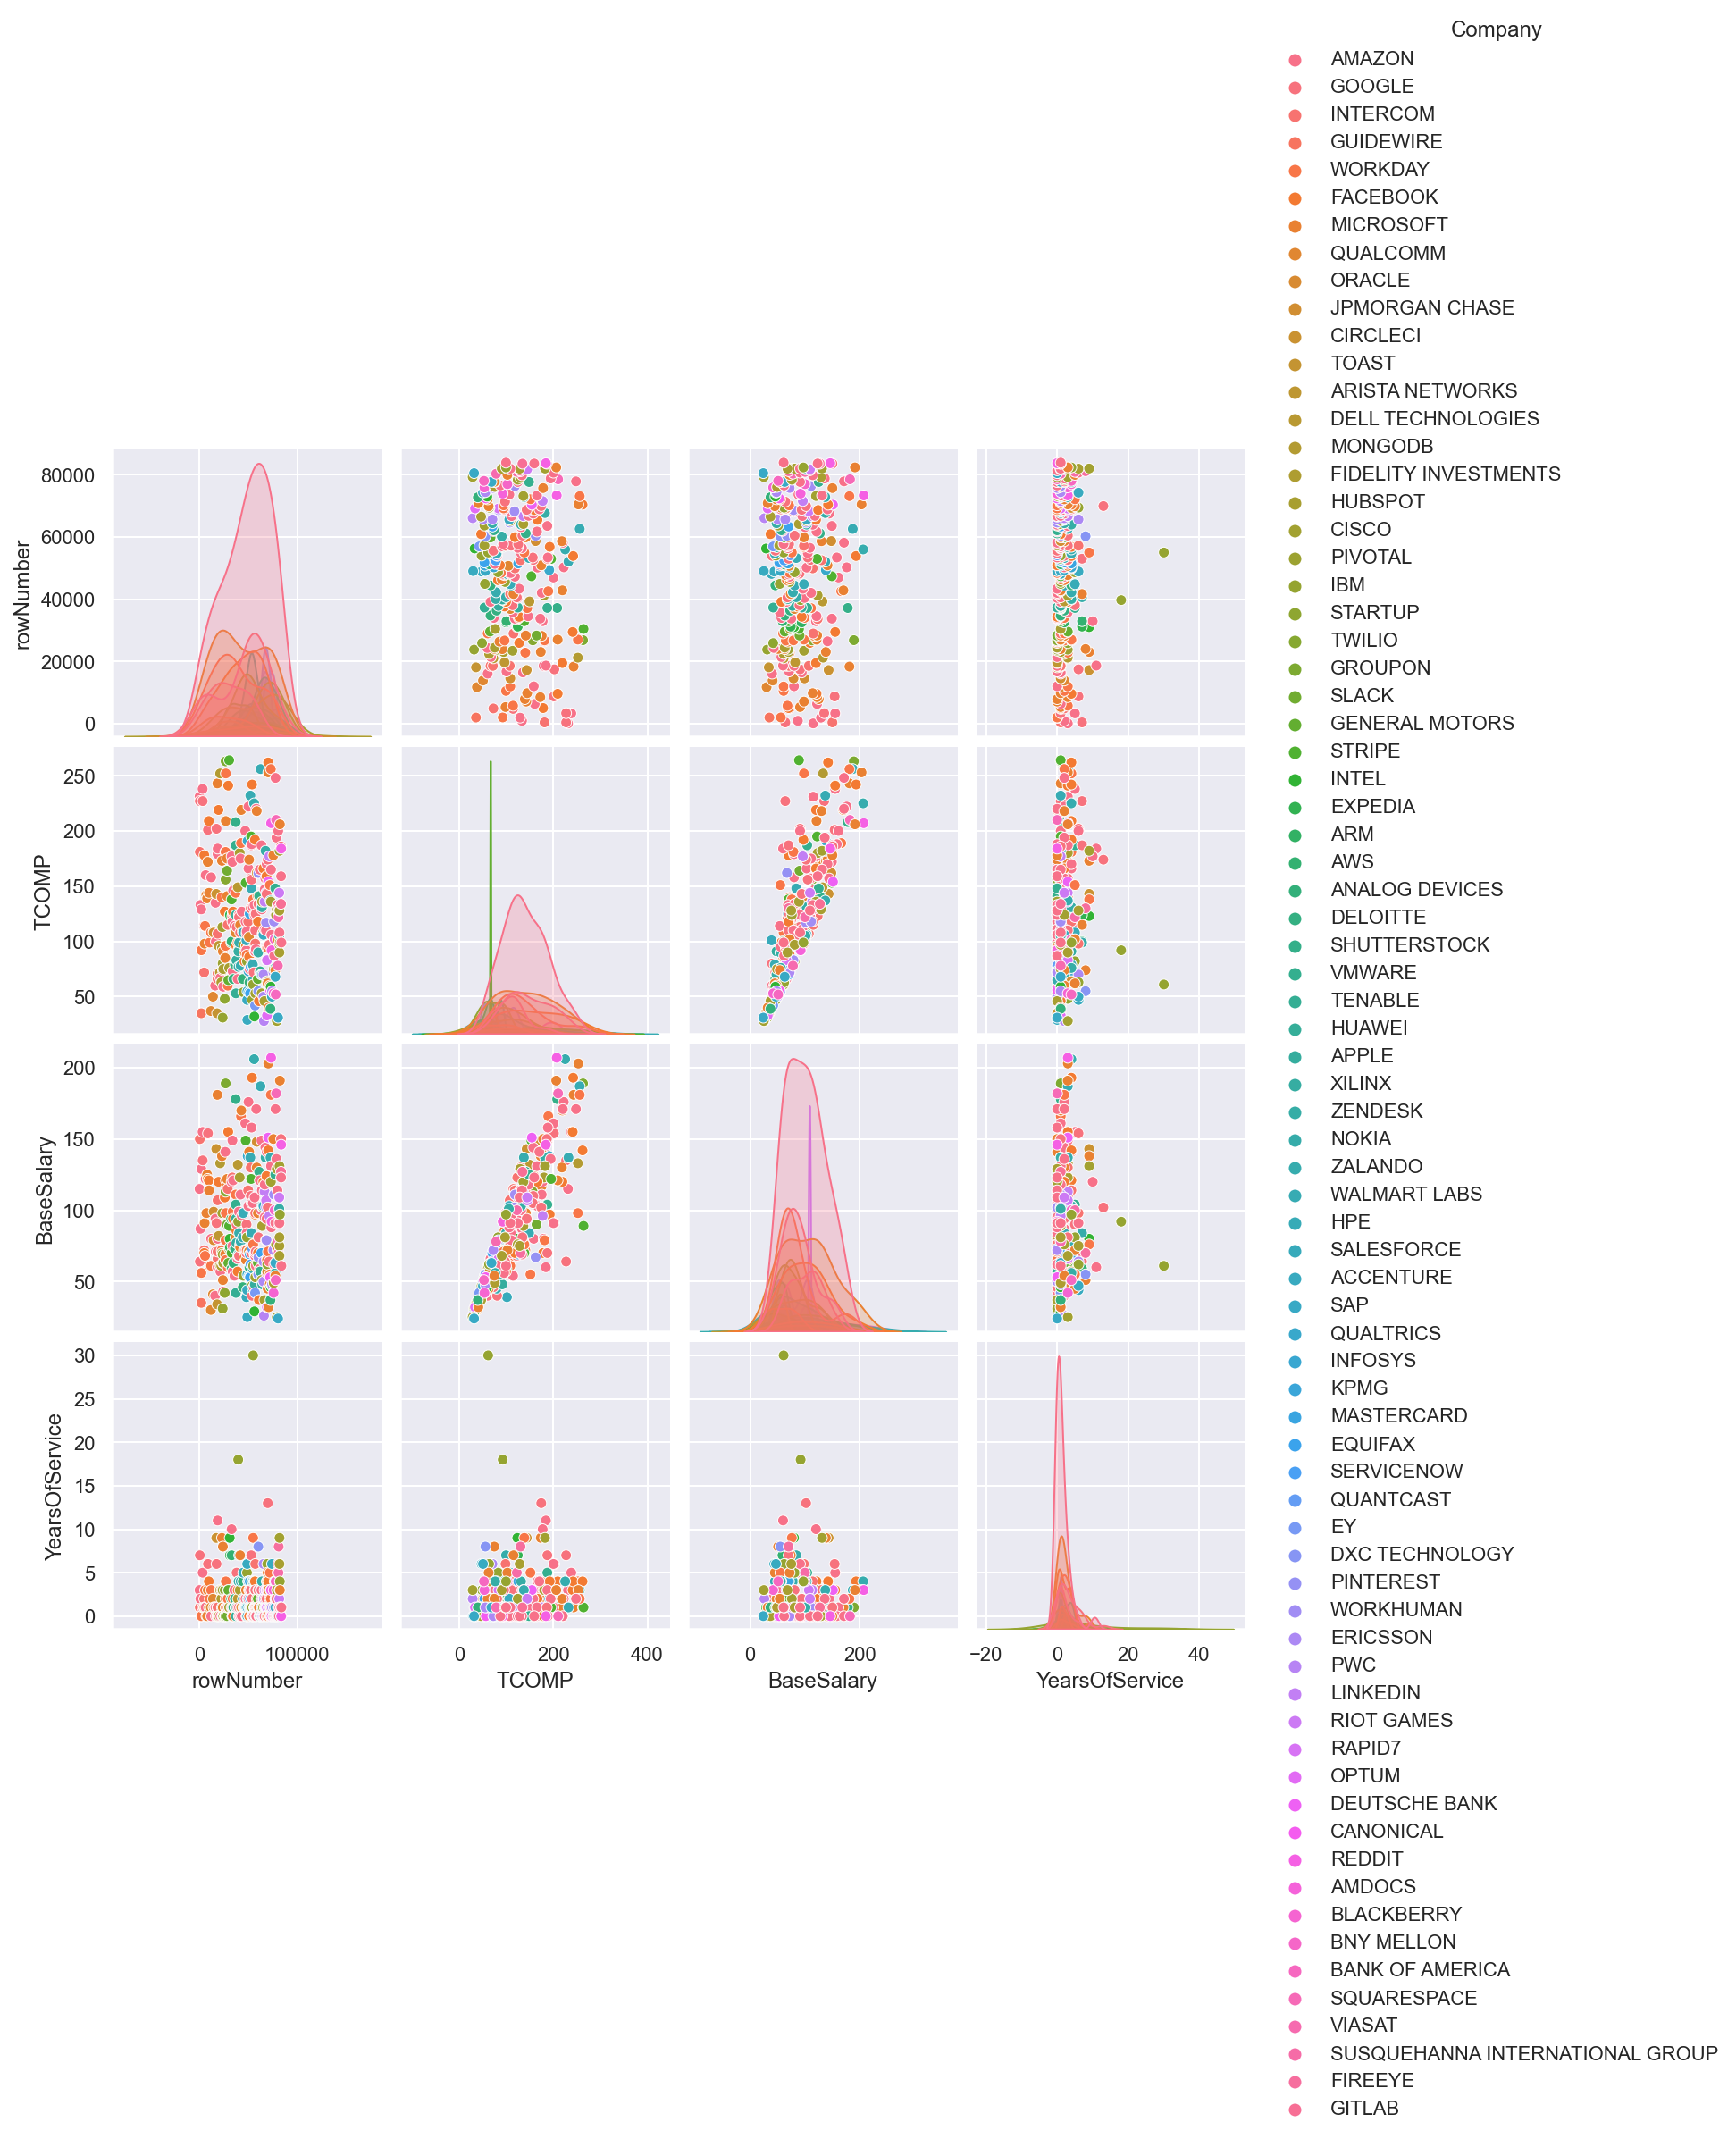

In [121]:
# Suppress warnings
warnings.filterwarnings('ignore')

PairPlotdf=CompaniesInIrelanddf_filtered[["Company","TCOMP","BaseSalary","YearsOfService"]]
PairPlotdf.to_csv('PairPlot.csv')
data = pd.read_csv("PairPlot.csv")
sns.pairplot(data, hue='Company')

# Custom Function to Plot Years of Service versus TCOMP

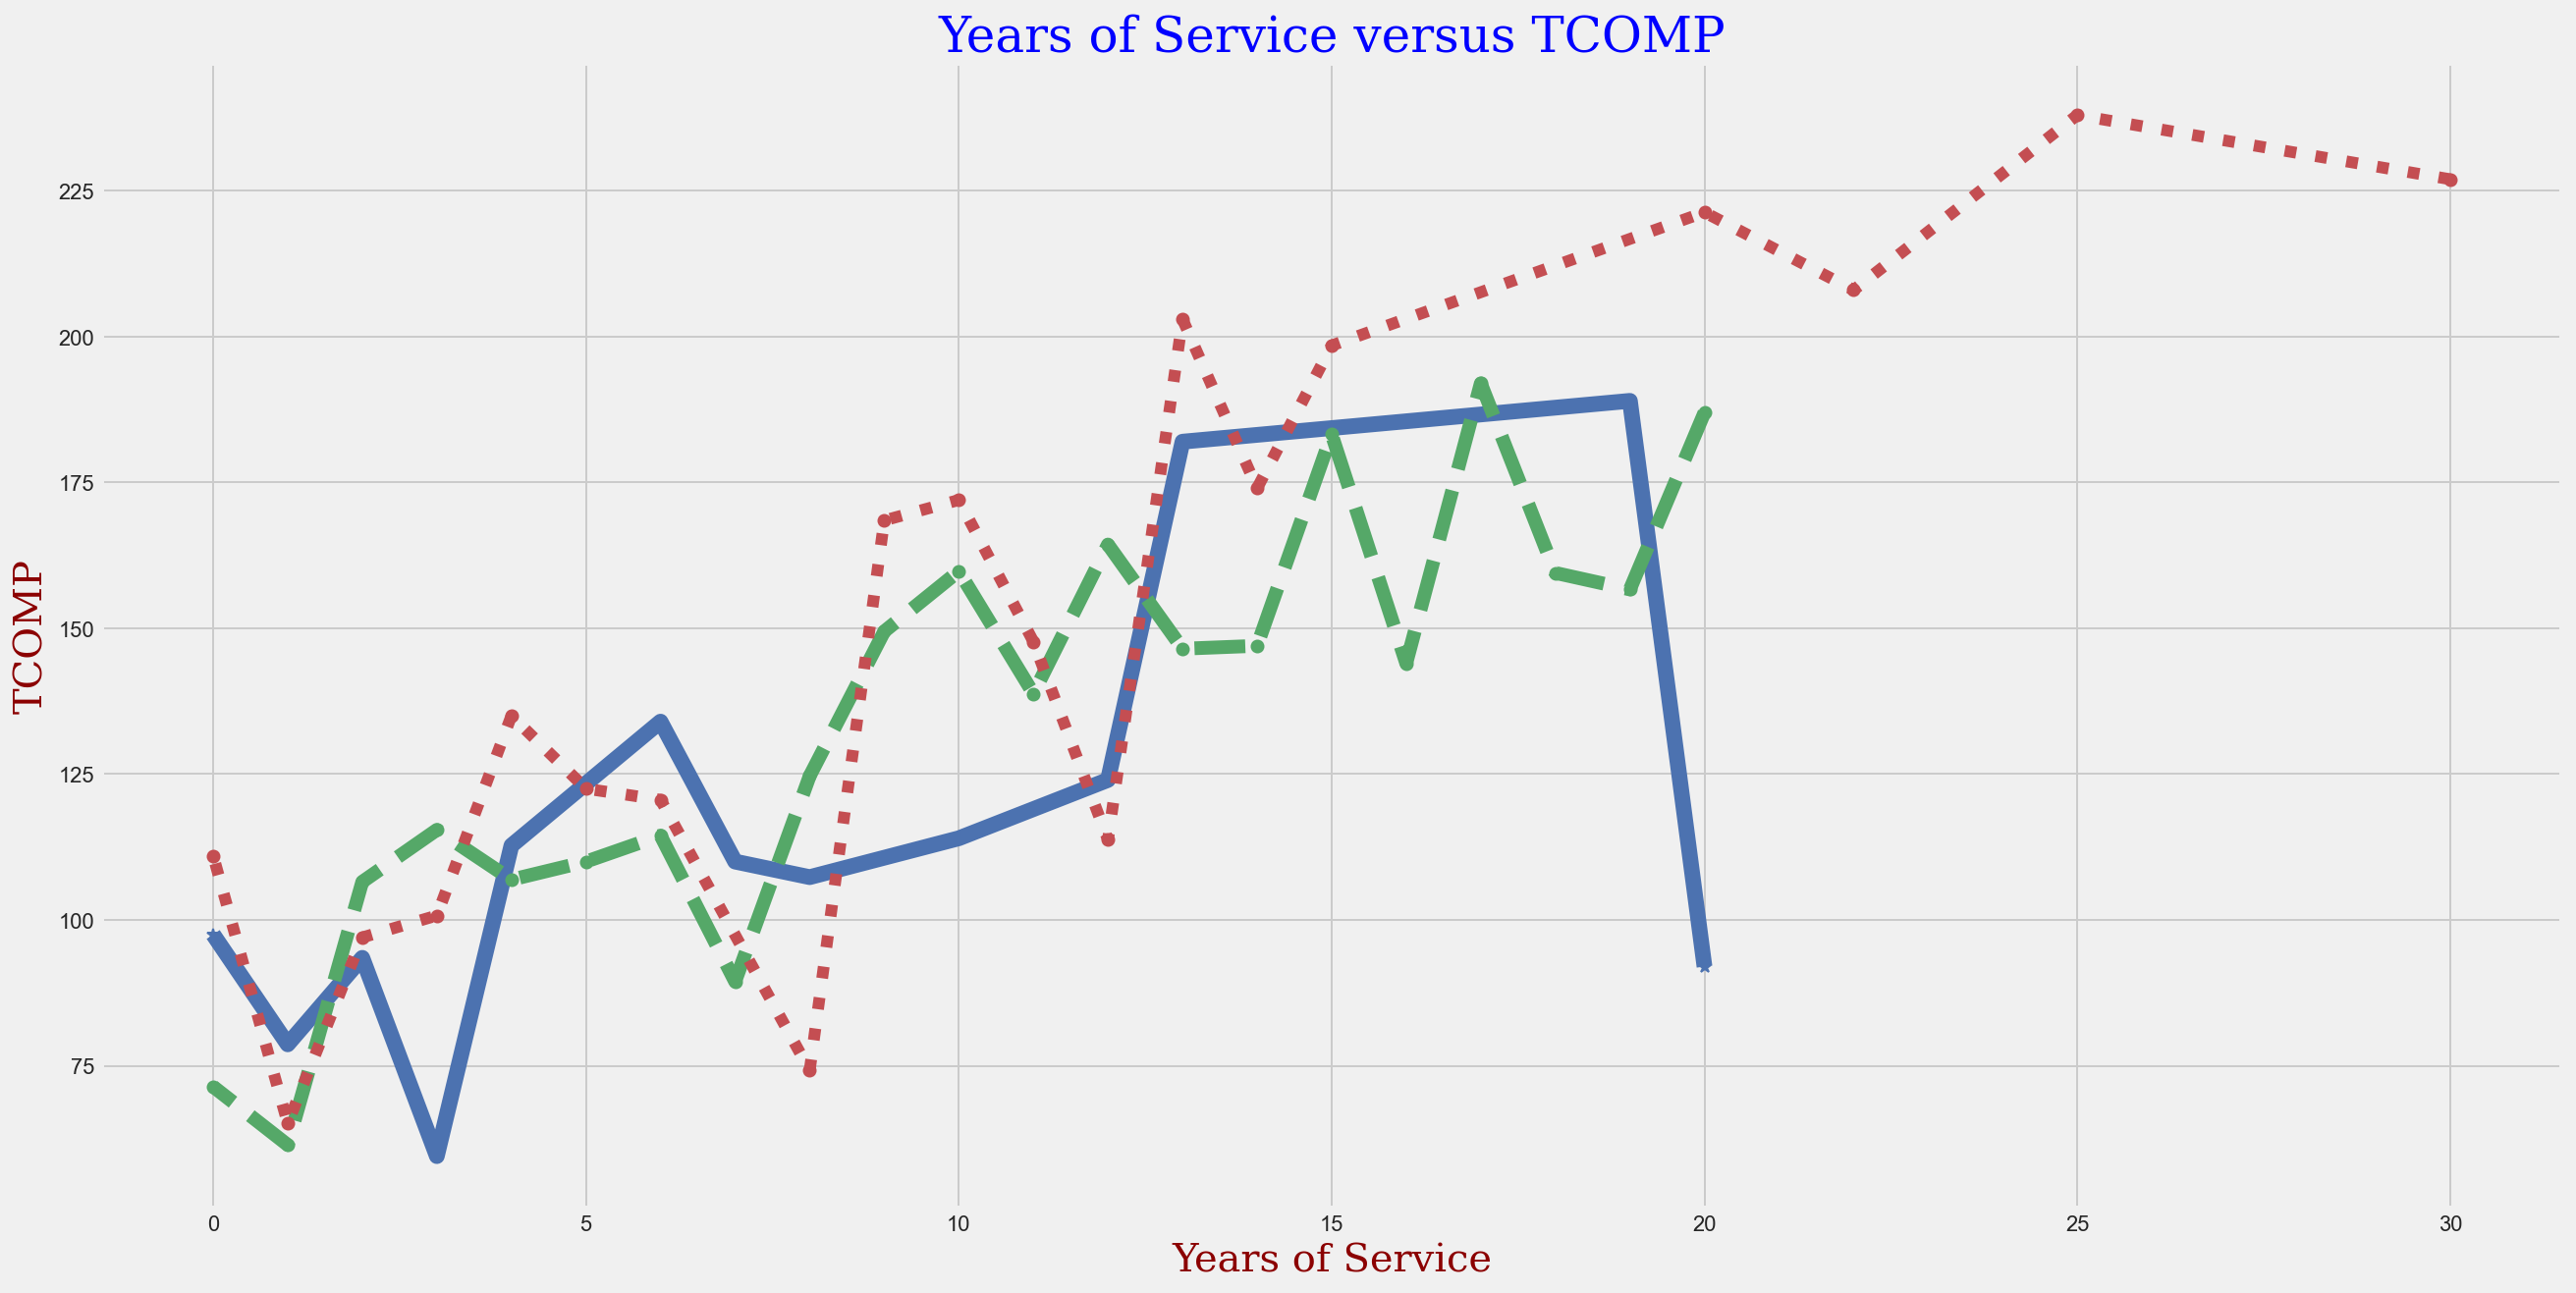

In [164]:
# Define a function called CorinnasPlotFunction - to fulfil scoring criteria

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [20, 10]
# Set up with a higher resolution screen
#%config InlineBackend.figure_format = 'retina'
#matplotlib.style.use('fivethirtyeight')

#CompaniesInIrelanddf_filtered by Gender
FemaleSalaryIreland=(CompaniesInIrelanddf_filtered['Gender'].str.contains('Female',na=False))
FemaleSalaryIrelanddf=CompaniesInIrelanddf_filtered.loc[FemaleSalaryIreland]
FemaleSalaryIrelanddf=FemaleSalaryIrelanddf.groupby(['YearsOfExperience'])['TCOMP'].mean().reset_index().sort_values('YearsOfExperience',ascending = False )


MaleSalaryIreland=(CompaniesInIrelanddf_filtered['Gender'].str.contains('Male',na=False))
MaleSalaryIrelanddf=CompaniesInIrelanddf_filtered.loc[MaleSalaryIreland]
MaleSalaryIrelanddf=MaleSalaryIrelanddf.groupby(['YearsOfExperience'])['TCOMP'].mean().reset_index().sort_values('YearsOfExperience',ascending = False )


NDSalaryIreland=(CompaniesInIrelanddf_filtered['Gender'].str.contains('NotDisclosed',na=False))
NDSalaryIrelanddf=CompaniesInIrelanddf_filtered.loc[NDSalaryIreland]
NDSalaryIrelanddf=NDSalaryIrelanddf.groupby(['YearsOfExperience'])['TCOMP'].mean().reset_index().sort_values('YearsOfExperience',ascending = False )



def CorinnasPlotFunction(x, y,color,linestyle,linewidth,marker):
# Plot the inputs x,y in the provided colour
   ax.plot(x, y, color=color, linestyle=linestyle, linewidth=linewidth, marker=marker)

fig, ax = plt.subplots()
CorinnasPlotFunction(FemaleSalaryIrelanddf["YearsOfExperience"],FemaleSalaryIrelanddf["TCOMP"], "b","solid","8",'*')
CorinnasPlotFunction(MaleSalaryIrelanddf["YearsOfExperience"],MaleSalaryIrelanddf["TCOMP"], "g","dashed","7",'o')
CorinnasPlotFunction(NDSalaryIrelanddf["YearsOfExperience"],NDSalaryIrelanddf["TCOMP"], "r","dotted","6",'o')
ax.set_title("Years of Service versus TCOMP",fontdict = font1)

ax.set_xlabel("Years of Service", fontdict = font2)
ax.set_ylabel("TCOMP", fontdict = font2)
plt.show()


# Stock Data

In [214]:
#Companies located in Ireland are in the InIreland dataframe

# Convert to List
FilteredTitles=InIreland.Title.unique().tolist()

#Filter out undesired titles such as Marketing
Irish_JobTitles_filtered = InIreland[InIreland['Title'].isin(['Software Engineer', 'Solution Architect', 'Business Analyst', 'Technical Program Manager', 'Data Scientist'])]
Irish_JobTitles_filtered.head()
newFilteredTitles=Irish_JobTitles_filtered.Title.unique().tolist()
print(newFilteredTitles)


Irish_StockGrantCompanies_filtered = Irish_JobTitles_filtered[Irish_JobTitles_filtered['StockGrant']>0]
#Irish_StockGrantCompanies_filtered.to_csv("Irish_StockGrantCompanies_filtered1.csv")


newFilteredCompanies=Irish_StockGrantCompanies_filtered.Company.unique().tolist()
print(newFilteredCompanies)

#Drop Companies from the dataframe where unable to find a ticker in yahoo finance'
NewSalarydf = Irish_StockGrantCompanies_filtered[~Irish_StockGrantCompanies_filtered['Company'].isin(['INTERCOM', 'STARTUP', 'SLACK', 'STRIPE', 'AWS', 'WALMART LABS', 'QUANTCAST','LINKEDIN','RIOT GAMES', 'FIREEYE', 'HUAWEI', 'REDDIT'])]

# Stock ticker dictionary
StockTicker = {'AMAZON':'AMZN', 'MICROSOFT':'MSFT','CISCO':'CSCO', 'GOOGLE':'GOOG', 'WORKDAY':'WDAY', 'FACEBOOK':'META','TOAST':'TOST', 'ARISTA NETWORKS':'ANET','MONGODB':'MDB','HUBSPOT':'HUBS','PIVOTAL':'PICC','TWILIO':'TWLO','EXPEDIA':'EXPE','SHUTTERSTOCK':'SSTK','VMWARE':'VMW','TENABLE':'TENB','QUALTRICS':'XM','SERVICENOW':'NOW','RAPID7':'RPD','ZALANDO':'ZLNDY','ZENDESK':'ZEN'}
  
# Mapping the dictionary keys to the data frame.
NewSalarydf['Ticker'] = NewSalarydf['Company'].map(StockTicker)
NewSalarydf.to_csv("NewSalarydf2.csv")


['Software Engineer', 'Solution Architect', 'Business Analyst', 'Technical Program Manager', 'Data Scientist']
['AMAZON', 'MICROSOFT', 'GOOGLE', 'INTERCOM', 'WORKDAY', 'FACEBOOK', 'TOAST', 'ARISTA NETWORKS', 'MONGODB', 'HUBSPOT', 'PIVOTAL', 'STARTUP', 'TWILIO', 'SLACK', 'STRIPE', 'EXPEDIA', 'AWS', 'SHUTTERSTOCK', 'VMWARE', 'TENABLE', 'WALMART LABS', 'QUALTRICS', 'SERVICENOW', 'QUANTCAST', 'ZALANDO', 'ZENDESK', 'LINKEDIN', 'RIOT GAMES', 'RAPID7', 'CISCO', 'FIREEYE', 'HUAWEI', 'REDDIT']
                 Date    Company              Title     TCOMP  \
rowNumber                                                       
53         2017-08-13     AMAZON  Software Engineer     231.0   
164        2017-11-30  MICROSOFT  Software Engineer  104973.0   
381        2018-03-11     GOOGLE  Software Engineer     227.0   
384        2018-03-11    WORKDAY  Software Engineer  132951.0   
447        2018-04-04     AMAZON  Software Engineer  204135.0   
...               ...        ...                ...    

In [233]:
# Define the instruments to download. We would like to see Apple, Microsoft and Intel.

tickers = ['XM','NOW','RPD','ZLNDY','ZEN','AMZN','CSCO','MSFT','GOOG','META','AAPL','MSFT', 'WDAY','GWRE','INTC','ORCL','TOST','ANET','MDB','HUBS','PICC','TWLO','EXPE','SSTK','VMW','TENB']
start_date = '2022-11-11'
end_date = '2022-11-11'

# Use pandas_reader.data.DataReader to load the desired data. 
stock_data = pdr.data.DataReader(tickers, 'yahoo', start_date, end_date)
print(stock_data.head())
stock_data.to_csv("StockData.csv")
#print(stock_data.dtypes)
#print(stock_data.index)


Attributes Adj Close                                                       \
Symbols           XM         NOW        RPD  ZLNDY        ZEN        AMZN   
Date                                                                        
2022-11-11     11.48  409.910004  31.379999  17.25  76.699997  100.790001   

Attributes                                                ...    Volume  \
Symbols          CSCO        MSFT       GOOG        META  ...      TOST   
Date                                                      ...             
2022-11-11  44.790001  247.110001  96.730003  113.019997  ...  21973100   

Attributes                                                               \
Symbols        ANET      MDB     HUBS    PICC     TWLO     EXPE    SSTK   
Date                                                                      
2022-11-11  2874800  2790200  1201500  100600  6949700  3097500  255900   

Attributes                   
Symbols        VMW     TENB  
Date                         

In [234]:
stock_data=stock_data.transpose()

#Find the Stock Opening Price


In [235]:
stock_data.head(50)
#stock_data.info()
#stock_data=stock_data[stock_data['Attributes'].isin(['Open'])]
#stock_data.to_csv("TransposedStockData1.csv")

Date                2022-11-11
Attributes Symbols            
Adj Close  XM        11.480000
           NOW      409.910004
           RPD       31.379999
           ZLNDY     17.250000
           ZEN       76.699997
           AMZN     100.790001
           CSCO      44.790001
           MSFT     247.110001
           GOOG      96.730003
           META     113.019997
           AAPL     149.699997
           WDAY     156.949997
           GWRE      60.930000
           INTC      30.430000
           ORCL      77.739998
           TOST      20.480000
           ANET     128.550003
           MDB      175.940002
           HUBS     306.089996
           PICC       9.940000
           TWLO      55.270000
           EXPE     102.790001
           SSTK      53.910000
           VMW      115.970001
           TENB      39.750000
Close      XM        11.480000
           NOW      409.910004
           RPD       31.379999
           ZLNDY     17.250000
           ZEN       76.699997
           AMZN     100.790001
           CSCO      44.790001
           MSFT     247.110001
           GOOG      96.730003
           META     113.019997
           AAPL     149.699997
           WDAY     156.949997
           GWRE      60.930000
           INTC      30.430000
           ORCL      77.739998
           TOST      20.480000
           ANET     128.550003
           MDB      175.940002
           HUBS     306.089996
           PICC       9.940000
           TWLO      55.270000
           EXPE     102.790001
           SSTK      53.910000
           VMW      115.970001
           TENB      39.750000

In [246]:
#stock_data.to_csv("TransposedStock.csv")
stock_data = pd.read_csv('TransposedStock.csv')
stock_data = stock_data[stock_data['Attributes'].isin(['Open'])]
stock_data.set_index('Symbols')
stock_data.columns = ["RowNum","Attributes","Ticker","OpeningPrice"]
stock_data.head()

,RowNum,Attributes,Ticker,OpeningPrice
100,100,Open,XM,11.240000
101,101,Open,NOW,406.989990
102,102,Open,RPD,29.990000
103,103,Open,ZLNDY,16.190300
104,104,Open,ZEN,76.629997


In [247]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 100 to 124
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowNum        25 non-null     int64  
 1   Attributes    25 non-null     object 
 2   Ticker        25 non-null     object 
 3   OpeningPrice  25 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


# Merge Salary Dataframe and StockPrice Dataframe

In [248]:
#Test Merge
MergeCompanyStockdf = pd.merge(NewSalarydf,
                 stock_data[['Ticker', 'OpeningPrice']],
                 on='Ticker')

MergeCompanyStockdf.head()


,Date,Company,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId,Ticker,OpeningPrice
0,2017-08-13,AMAZON,Software Engineer,231.0,"Dublin, DN, Ireland",11,3,115.0,115.0,1.0,NotDisclosed,4015,AMZN,97.879997
1,2018-04-04,AMAZON,Software Engineer,204135.0,"Dublin, DN, Ireland",11,1,87997.0,32457.0,83681.0,NotDisclosed,4015,AMZN,97.879997
2,2018-06-12,AMAZON,Software Engineer,133.0,"Dublin, DN, Ireland",15,2,87.0,46.0,0.0,Male,4015,AMZN,97.879997
3,2018-10-31,AMAZON,Software Engineer,238.0,"Dublin, DN, Ireland",25,5,155.0,83.0,0.0,NotDisclosed,4015,AMZN,97.879997
4,2019-03-02,AMAZON,Software Engineer,160.0,"Dublin, DN, Ireland",12,1,122.0,25.0,13.0,Male,4015,AMZN,97.879997


In [249]:
MergeCompanyStockdf.to_csv("MergeCompanyStock.csv")

In [ ]:
Corinnas Project 
References 
    https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e
    #https://www.datasciencelearner.com/yahoo-finance-api-python/
   https://www.youtube.com/watch?v=sgndYho8RyI
    https://www.analyticsvidhya.com/blog/2021/12/stock-market-analysis-with-pandas-datareader-and-plotly-for-beginners/
        https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
        